# Pymaceuticals Inc.

## Analysis:

***

### <font color=blue>1. Preparing the data:</font>

In [1]:
# Imported dependencies and setup:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Created the study data file's path:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combined the data into a single dataset:
merge_df = mouse_metadata.merge(study_results, how='right', on='Mouse ID')

# Reordered the columns and displayed the data table for preview:
merge_df = merge_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex',
                     'Age_months', 'Weight (g)']]
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


***

In [2]:
# Checked the number of mice:
merge_df['Mouse ID'].nunique()

249

In [3]:
# Got the duplicate mice by ID number that showed up for Mouse ID and Timepoint:
duplicate_rows = merge_df[merge_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_mouse = duplicate_rows['Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Got all the data for the duplicate mouse ID:
duplicate_mouse_data = merge_df.loc[merge_df['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Created a clean DataFrame by dropping the duplicate mouse by its ID:
clean_merge_df = merge_df[merge_df['Mouse ID'] != 'g989']
clean_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checked the number of mice in the clean DataFrame:
clean_merge_df['Mouse ID'].nunique()

248

### <font color=purple>2. Summary statistics:</font>

In [7]:
# Generated a summary statistics table of the mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen:

# Used the groupby and summary statistical methods to calculate the following properties of each drug regimen: mean,
# median, variance, standard deviation, and SEM of the tumor volume. Assembled the resulting series into a single
# summary DataFrame:
mean_tumor = clean_merge_df.groupby(['Drug Regimen']).mean(numeric_only=True)['Tumor Volume (mm3)']
median_tumor = clean_merge_df.groupby(['Drug Regimen']).median(numeric_only=True)['Tumor Volume (mm3)']
var_tumor = clean_merge_df.groupby(['Drug Regimen']).var(numeric_only=True)['Tumor Volume (mm3)']
std_tumor = clean_merge_df.groupby(['Drug Regimen']).std(numeric_only=True)['Tumor Volume (mm3)']
sem_tumor = clean_merge_df.groupby(['Drug Regimen']).sem(numeric_only=True)['Tumor Volume (mm3)']

summ_stats = pd.DataFrame({"Mean Tumor Volume": mean_tumor, "Median Tumor Volume": median_tumor,
                           "Tumor Volume Variance": var_tumor, "Tumor Volume Std. Dev.": std_tumor,
                           "Tumor Volume Std. Err.": sem_tumor})
summ_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generated a summary statistics table of the mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen:

# Used the aggregation method to produce the same summary statistics, as in the previous cell, in a single line:
summ_stats_agg = clean_merge_df.groupby(['Drug Regimen']).aggregate({'Tumor Volume (mm3)': ['mean', 'median', 'var',
                                                                                            'std', 'sem']})
summ_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

### <font color=blue>3. Bar and Pie Charts:</font>

Text(0, 0.5, 'Number of Mice Tested')

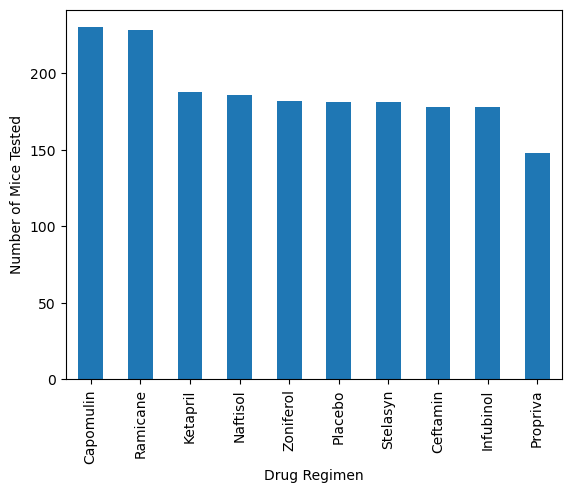

In [9]:
# Generated a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_merge_df_total_number_timepoints = clean_merge_df.groupby(['Drug Regimen']).count()['Timepoint']
clean_merge_df_total_number_timepoints = clean_merge_df_total_number_timepoints.sort_values(ascending=False)
clean_merge_df_total_number_timepoints.plot(kind='bar')
plt.ylabel('Number of Mice Tested')

([<matplotlib.axis.XTick at 0x7f85c43764a0>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

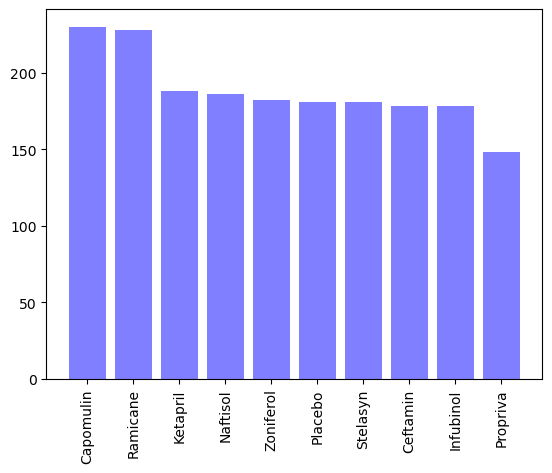

In [10]:
# Generated a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(clean_merge_df_total_number_timepoints))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, clean_merge_df_total_number_timepoints, color='blue', alpha=0.5, align='center')
plt.xticks(tick_locations, clean_merge_df_total_number_timepoints.index, rotation='vertical')
